# 2.2

In [128]:
"""
#オブジェクトの削除
del xxxxx

今回は何も読み込んでいないので関係無し
"""
import gc
#メモリの解放
gc.collect()

3267

In [129]:
! pwd

/Volumes/GoogleDrive/My Drive/Learning/rakus/CI coding practice


In [130]:
import pandas as pd
data02 = pd.read_csv("./causality-main/data02.csv")

In [131]:
data02.describe()

,x1,y3,t1,y0,y1,y0t,y1t
count,20.000000,20.000000,20.000000,14.000000,6.000000,20.000000,20.000000
mean,81.950000,76.600000,0.300000,77.785714,73.833333,73.800000,83.850000
std,8.999854,5.245549,0.470162,4.281958,6.615638,7.898034,8.430989
min,58.000000,61.000000,0.000000,72.000000,61.000000,52.000000,61.000000
25%,76.250000,75.000000,0.000000,75.000000,74.250000,69.500000,79.250000
50%,83.500000,76.500000,0.000000,77.000000,75.500000,75.000000,84.500000
75%,87.250000,80.000000,1.000000,80.000000,76.750000,78.500000,89.000000
max,96.000000,87.000000,1.000000,87.000000,80.000000,87.000000,97.000000


## 補足学習

In [132]:
data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      20 non-null     int64  
 1   y3      20 non-null     int64  
 2   t1      20 non-null     int64  
 3   y0      14 non-null     float64
 4   y1      6 non-null      float64
 5   y0t     20 non-null     int64  
 6   y1t     20 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 KB


In [133]:
data02

,x1,y3,t1,y0,y1,y0t,y1t
0,74,76,1,NaN,76.0,68,76
1,82,75,0,75.0,NaN,75,84
2,72,75,1,NaN,75.0,65,75
3,96,84,0,84.0,NaN,84,97
4,83,75,0,75.0,NaN,75,84
5,72,74,1,NaN,74.0,65,74
6,85,76,0,76.0,NaN,76,87
7,87,77,0,77.0,NaN,77,89
8,86,77,0,77.0,NaN,77,87
9,77,80,1,NaN,80.0,70,80


入学次の全員の試験点数はどうなっていたのか

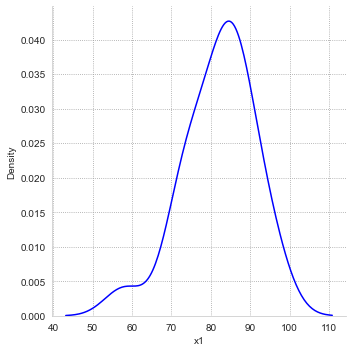

In [134]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(x=data02.x1, kind="kde",color='blue')
sns.set_style("whitegrid",
        {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

gridの設定はmatplotlibだとplt.gridでできるっぽい。
色々あるみたい。

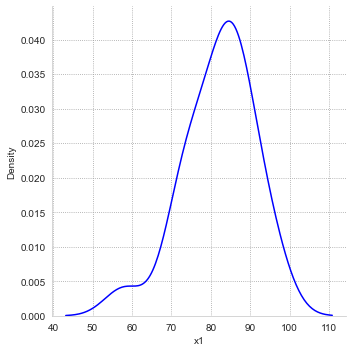

In [135]:
sns.displot(x=data02.x1, kind="kde",color='blue')
plt.grid("major")
plt.show()

näiveな群比較だとどうなっているのか

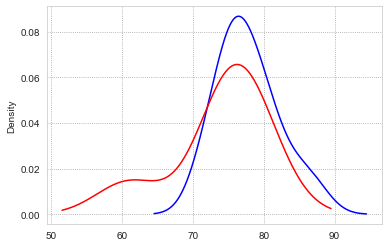

In [136]:
data02['y0'].plot(kind="kde", color='blue')
data02['y1'].plot(kind="kde", color='red')
plt.grid('major')
plt.show()

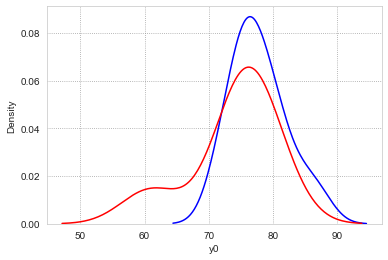

In [137]:
sns.kdeplot(data=data02.y0, shade=False, color="blue")
sns.kdeplot(data=data02.y1, shade=False, color='red')
plt.show()

y1の密度関数がRの挙動と結構違う。なぜ？<br>
欠損値を除いて描画してみる

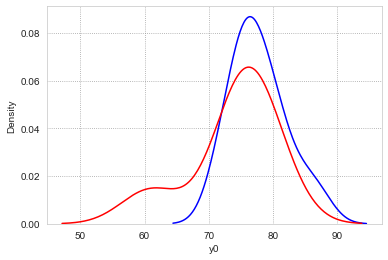

In [138]:
sns.kdeplot(data02.y0.dropna(how='any'), shade=False, 
            color="blue")
sns.kdeplot(data02.y1.dropna(how='any'), shade=False, 
            color='red')
plt.show()

--> 変わらず。<br>
RとPythonで密度推定の方法が多分違うんだなあ。

potential outcomes/潜在的結果を比較してみよう

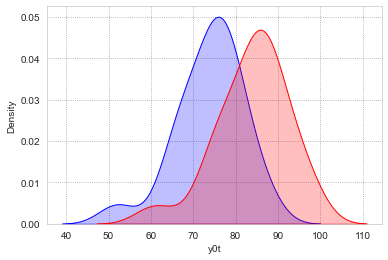

In [139]:
sns.kdeplot(data02.y0t, fill=True,
            color="blue")
sns.kdeplot(data02.y1t, fill=True,
            color='red')
plt.show()

# 2.3

In [140]:
data02.y1t - data02.y0t

0      8
1      9
2     10
3     13
4      9
5      9
6     11
7     12
8     10
9     10
10     9
11    10
12    10
13     9
14    12
15    12
16    10
17     9
18    10
19     9
dtype: int64

In [141]:
data02.y3 - data02.x1

0      2
1     -7
2      3
3    -12
4     -8
5      2
6     -9
7    -10
8     -9
9      3
10    -8
11    -9
12     3
13     3
14   -10
15    -8
16    -8
17    -9
18    -8
19    -8
dtype: int64

In [142]:
data02.y1 - data02.y0

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
dtype: float64

# 2.4

In [143]:
import numpy as np

In [144]:
np.mean(data02.y1t) - np.mean(data02.y0t)

10.049999999999997

In [145]:
data02.y1t.mean() - data02.y0t.mean()

10.049999999999997

pandasもnumpyも両方同じ数字を出すが、両方ともRの計算結果"10.05"とは異なる値になっている。

In [146]:
data02.y3.mean() - data02.x1.mean()

-5.3500000000000085

これも若干Rとは値が違う。

In [147]:
m1 = np.mean(data02.y1.dropna())
m0 = np.mean(data02.y0.dropna())
m1 - m0

-3.952380952380963

以下のコードと同等

In [148]:
m1 = np.nanmean(data02.y1)
m0 = np.nanmean(data02.y0)
m1 - m0

-3.952380952380963

ちなみにpythonはRと違い、勝手に欠損値を無視して平均を出してくれる
<br>--> 個々の観測値ごとの普通の四則演算はもちろんNaNを返すが

In [149]:
data02.y1.mean() - data02.y0.mean()

-3.952380952380963

In [150]:
data02.y1 - data02.y0

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
dtype: float64

# 2.5

In [151]:
mt1 = np.mean(data02.y1t[data02.t1==1])
mt0 = data02.y0t[data02.t1==1].mean()
mt1 - mt0

9.333333333333329

In [152]:
data02.y1t[data02.t1==1].mean() - \
data02.y0t[data02.t1==1].mean()

9.333333333333329

## pandas.DataFrame.loc関数について

pd.dataframe.loc関数を使わなきゃいけない場面っていつだっけ？

<font color='red'>複数の要素で検索をかけて参照したいときにloc関数を使わないといけない</font><br>
[このサイト](https://techacademy.jp/magazine/45550)もチェック<br>
以下では例を少し

In [153]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])

In [154]:
#これはエラーが出てしまう
df[['cobra','sidewinder']]

KeyError: "None of [Index(['cobra', 'sidewinder'], dtype='object')] are in the [columns]"

In [ ]:
df.loc[['cobra','sidewinder']]

,max_speed,shield
cobra,1,2
sidewinder,7,8


条件式で検索をかけるだけなら、locを使わずに複数の条件式で参照できるらしい

In [ ]:
df[(df['max_speed']>2) & (df['shield']>5)]

,max_speed,shield
sidewinder,7,8


In [ ]:
df.loc[(df['max_speed']>2) & (df['shield']>5)]

,max_speed,shield
sidewinder,7,8


# 2.8

In [ ]:
import os
os.chdir('/Volumes/GoogleDrive/My Drive/Learning/rakus/CI coding practice')

In [161]:
import pandas as pd
data02 = pd.read_csv('./causality-main/data02.csv')

import numpy as np
rng = np.random.default_rng(seed=1)
r0 = rng.uniform(low=0, high=1, size=20)
r1 = np.round_(r0)

y2 = np.full(len(r1), 1000000)
y2[r1==1] = data02.y1t[r1==1]
y2[r1==0] = data02.y0t[r1==0]

In [162]:
r1, y2

(array([1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0.]),
 array([76, 84, 65, 97, 75, 65, 87, 77, 87, 70, 96, 85, 67, 61, 81, 72, 72,
        80, 80, 78]))

もしif文とfor文で明示的に書くなら以下のコード


In [163]:
yTest = np.full(len(r1), 10000)
for i in range(len(r1)):
    if r1[i]==1:
        yTest[i] = data02.y1t[i]
    elif r1[i]==0:
        yTest[i] = data02.y0t[i]
    else:
        yTest[i] = np.nan

In [167]:
(y2 == yTest).all()

True

In [168]:
mr1 = np.mean(y2[r1==1])
mr0 = y2[r1==0].mean()
mr1 - mr0

10.625

Rと同じ乱数値を持ってくるコードは、ぱっと見大変そうなのでやらないことにする

# 2.10

In [172]:
import pingouin as pg

pg.ttest(x=y2[r1==1], y=y2[r1==0], alternative='two-sided', 
         confidence=0.95, correction=True)
#correction=Falseにするとwelch's correctionをオフにできる

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.413101,9.463428,two-sided,0.037791,"[0.74, 20.51]",1.248381,2.589,0.734658
